In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set styles for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

In [3]:
# Load the sample data
# Note: We will use the sample for now. When the full data is available, change this path.
file_path = "../data/raw/Waste_Management_and_Recycling_India.csv"
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Shape:", df.shape)
print("\n--- Data Types ---")
print(df.dtypes)
print("\n--- First 5 Rows ---")
display(df.head())

Dataset Shape: (850, 13)

--- Data Types ---
City/District                        object
Waste Type                           object
Waste Generated (Tons/Day)            int64
Recycling Rate (%)                    int64
Population Density (People/km²)       int64
Municipal Efficiency Score (1-10)     int64
Disposal Method                      object
Cost of Waste Management (₹/Ton)      int64
Awareness Campaigns Count             int64
Landfill Name                        object
Landfill Location (Lat, Long)        object
Landfill Capacity (Tons)              int64
Year                                  int64
dtype: object

--- First 5 Rows ---


,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,2019
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,2019
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,"22.4265, 77.4931",45575,2019


In [ ]:
# Check for Missing Values
print("--- Missing Values ---")
print(df.isnull().sum())

--- Missing Values ---
City/District                        0
Waste Type                           0
Waste Generated (Tons/Day)           0
Recycling Rate (%)                   0
Population Density (People/km²)      0
Municipal Efficiency Score (1-10)    0
Disposal Method                      0
Cost of Waste Management (₹/Ton)     0
Awareness Campaigns Count            0
Landfill Name                        0
Landfill Location (Lat, Long)        0
Landfill Capacity (Tons)             0
Year                                 0
dtype: int64
--- Descriptive Statistics ---
       Waste Generated (Tons/Day)  Recycling Rate (%)  \
count                  850.000000          850.000000   
mean                  5262.249412           57.076471   
std                   2786.984735           16.129994   
min                    511.000000           30.000000   
25%                   2865.750000           43.000000   
50%                   5283.000000           56.000000   
75%                   7757.

In [5]:
# Basic Descriptive Statistics for Numerical Features
print("--- Descriptive Statistics ---")
print(df.describe())

--- Descriptive Statistics ---
       Waste Generated (Tons/Day)  Recycling Rate (%)  \
count                  850.000000          850.000000   
mean                  5262.249412           57.076471   
std                   2786.984735           16.129994   
min                    511.000000           30.000000   
25%                   2865.750000           43.000000   
50%                   5283.000000           56.000000   
75%                   7757.250000           71.000000   
max                   9980.000000           85.000000   

       Population Density (People/km²)  Municipal Efficiency Score (1-10)  \
count                       850.000000                         850.000000   
mean                      13489.705882                           7.400000   
std                        6631.081494                           1.722162   
min                        2335.000000                           5.000000   
25%                        7927.000000                           6.000

In [8]:
# Analyze Categorical Variables
categorical_cols = ['City/District', 'Waste Type', 'Disposal Method', 'Landfill Name', 'Year']
for col in categorical_cols:
    print(f"\n--- Value Counts for {col} ---")
    print(df[col].value_counts())


--- Value Counts for City/District ---
City/District
Mumbai                25
Delhi                 25
Bengaluru             25
Chennai               25
Kolkata               25
Hyderabad             25
Pune                  25
Ahmedabad             25
Jaipur                25
Lucknow               25
Surat                 25
Kanpur                25
Nagpur                25
Patna                 25
Bhopal                25
Thiruvananthapuram    25
Indore                25
Vadodara              25
Guwahati              25
Coimbatore            25
Ranchi                25
Amritsar              25
Jodhpur               25
Varanasi              25
Ludhiana              25
Agra                  25
Meerut                25
Nashik                25
Rajkot                25
Madurai               25
Jabalpur              25
Allahabad             25
Visakhapatnam         25
Gwalior               25
Name: count, dtype: int64

--- Value Counts for Waste Type ---
Waste Type
Plastic         170
Or

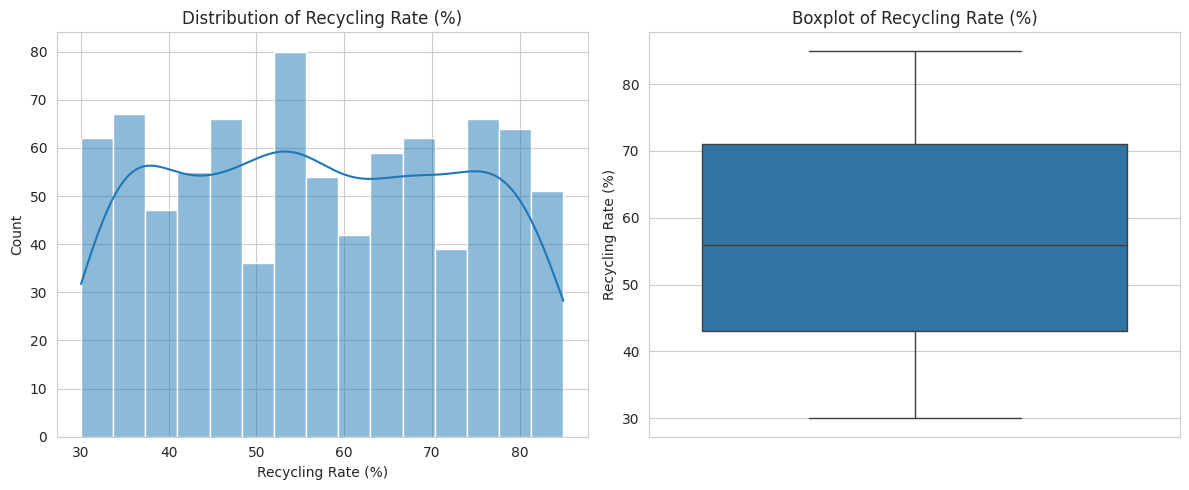

Target Variable 'Recycling Rate (%)'
Skewness: 0.03


In [ ]:
# Analyze the Target Variable
plt.figure(figsize=(12, 5))

# Subplot 1: Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Recycling Rate (%)'], kde=True, bins=15)
plt.title('Distribution of Recycling Rate (%)')

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Recycling Rate (%)'])
plt.title('Boxplot of Recycling Rate (%)')

plt.tight_layout()
plt.show()

print(f"Target Variable 'Recycling Rate (%)'")
print(f"Skewness: {df['Recycling Rate (%)'].skew():.2f}")

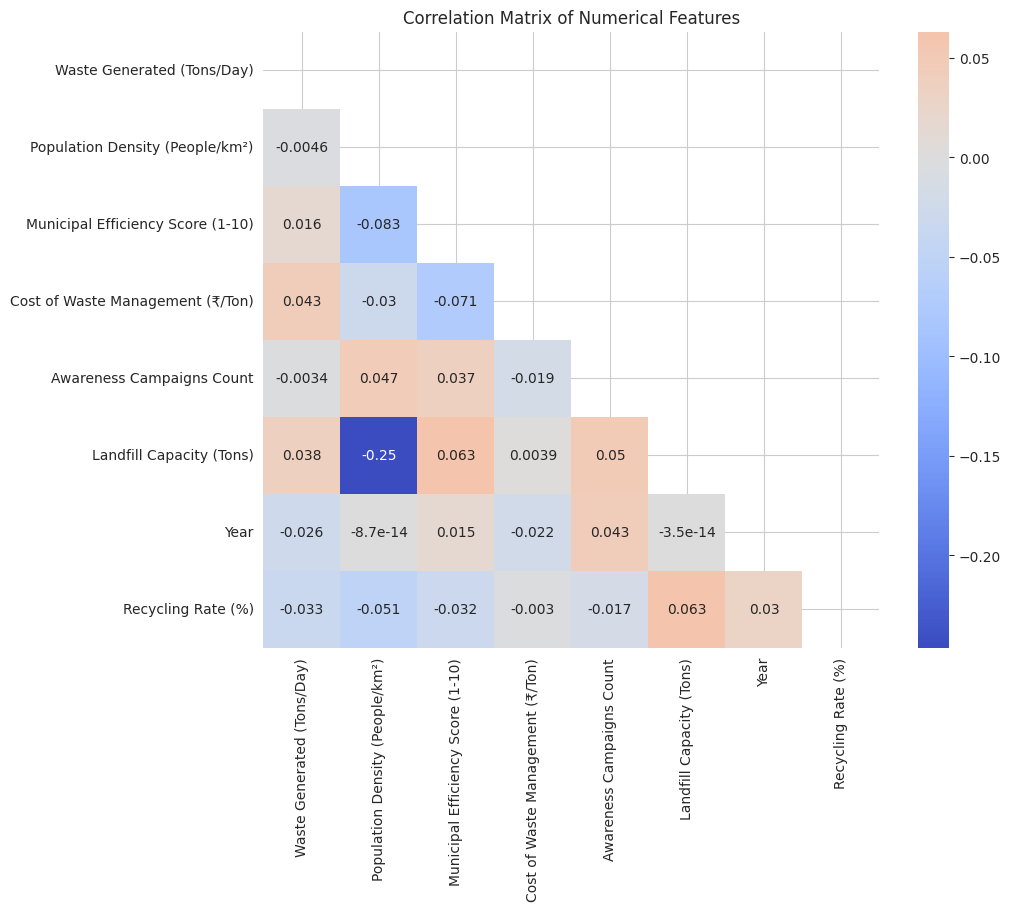

In [9]:
# Correlation Analysis (Numerical Features)
# Select numerical columns (excluding target for now)
numerical_features = ['Waste Generated (Tons/Day)', 'Population Density (People/km²)',
                      'Municipal Efficiency Score (1-10)', 'Cost of Waste Management (₹/Ton)',
                      'Awareness Campaigns Count', 'Landfill Capacity (Tons)', 'Year']
# Calculate correlation matrix
corr_matrix = df[numerical_features + ['Recycling Rate (%)']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask upper triangle for clarity
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

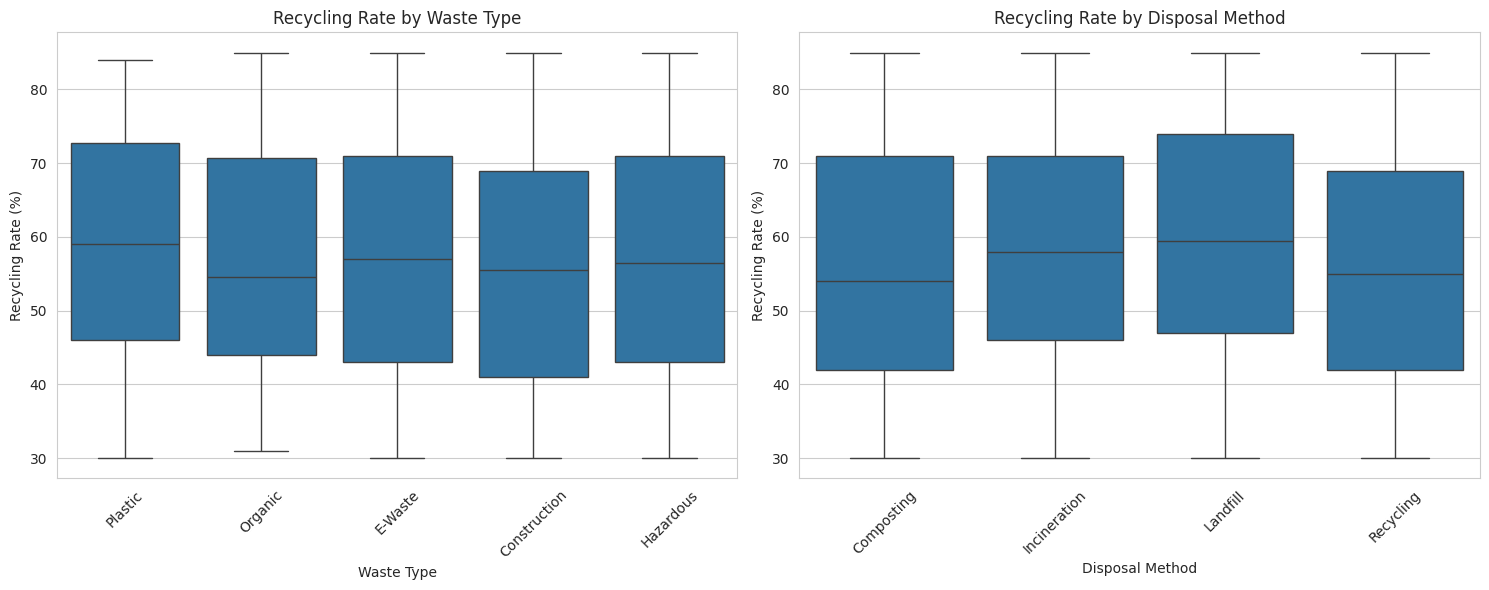

In [10]:
# Preliminary Relationship with Categorical Features
plt.figure(figsize=(15, 6))

# Subplot 1: Recycling Rate by Waste Type
plt.subplot(1, 2, 1)
sns.boxplot(x='Waste Type', y='Recycling Rate (%)', data=df)
plt.xticks(rotation=45)
plt.title('Recycling Rate by Waste Type')

# Subplot 2: Recycling Rate by Disposal Method
plt.subplot(1, 2, 2)
sns.boxplot(x='Disposal Method', y='Recycling Rate (%)', data=df)
plt.xticks(rotation=45)
plt.title('Recycling Rate by Disposal Method')

plt.tight_layout()
plt.show()

In [11]:
# Comprehensive Missing Value Analysis
print("--- Missing Values ---")
missing_info = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_info, 'Missing %': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0])  # Show only columns with missing values

# Descriptive Statistics for Numerical Features
print("--- Descriptive Statistics ---")
print(df.describe())

--- Missing Values ---
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []
--- Descriptive Statistics ---
       Waste Generated (Tons/Day)  Recycling Rate (%)  \
count                  850.000000          850.000000   
mean                  5262.249412           57.076471   
std                   2786.984735           16.129994   
min                    511.000000           30.000000   
25%                   2865.750000           43.000000   
50%                   5283.000000           56.000000   
75%                   7757.250000           71.000000   
max                   9980.000000           85.000000   

       Population Density (People/km²)  Municipal Efficiency Score (1-10)  \
count                       850.000000                         850.000000   
mean                      13489.705882                           7.400000   
std                        6631.081494                           1.722162   
min                        2335.000000                        

In [13]:
# Analyze Categorical Variables (Cardinality)
categorical_cols = ['City/District', 'Waste Type', 'Disposal Method', 'Landfill Name', 'Year']
for col in categorical_cols:
    print(f"\n--- Value Counts for {col} ---")
    num_unique = df[col].nunique()
    print(f"Number of unique values: {num_unique}")
    if num_unique <= 20:  # Avoid printing huge lists
        print(df[col].value_counts())
    else:
        print(f"(Too many to display. First 10: {df[col].unique()[:10]})")


--- Value Counts for City/District ---
Number of unique values: 34
(Too many to display. First 10: ['Mumbai' 'Delhi' 'Bengaluru' 'Chennai' 'Kolkata' 'Hyderabad' 'Pune'
 'Ahmedabad' 'Jaipur' 'Lucknow'])

--- Value Counts for Waste Type ---
Number of unique values: 5
Waste Type
Plastic         170
Organic         170
E-Waste         170
Construction    170
Hazardous       170
Name: count, dtype: int64

--- Value Counts for Disposal Method ---
Number of unique values: 4
Disposal Method
Incineration    218
Recycling       213
Landfill        210
Composting      209
Name: count, dtype: int64

--- Value Counts for Landfill Name ---
Number of unique values: 34
(Too many to display. First 10: ['Mumbai Landfill' 'Delhi Landfill' 'Bengaluru Landfill'
 'Chennai Landfill' 'Kolkata Landfill' 'Hyderabad Landfill'
 'Pune Landfill' 'Ahmedabad Landfill' 'Jaipur Landfill' 'Lucknow Landfill'])

--- Value Counts for Year ---
Number of unique values: 5
Year
2019    170
2020    170
2021    170
2022    170


Text(0.5, 1.0, 'Recycling Rate by Disposal Method')

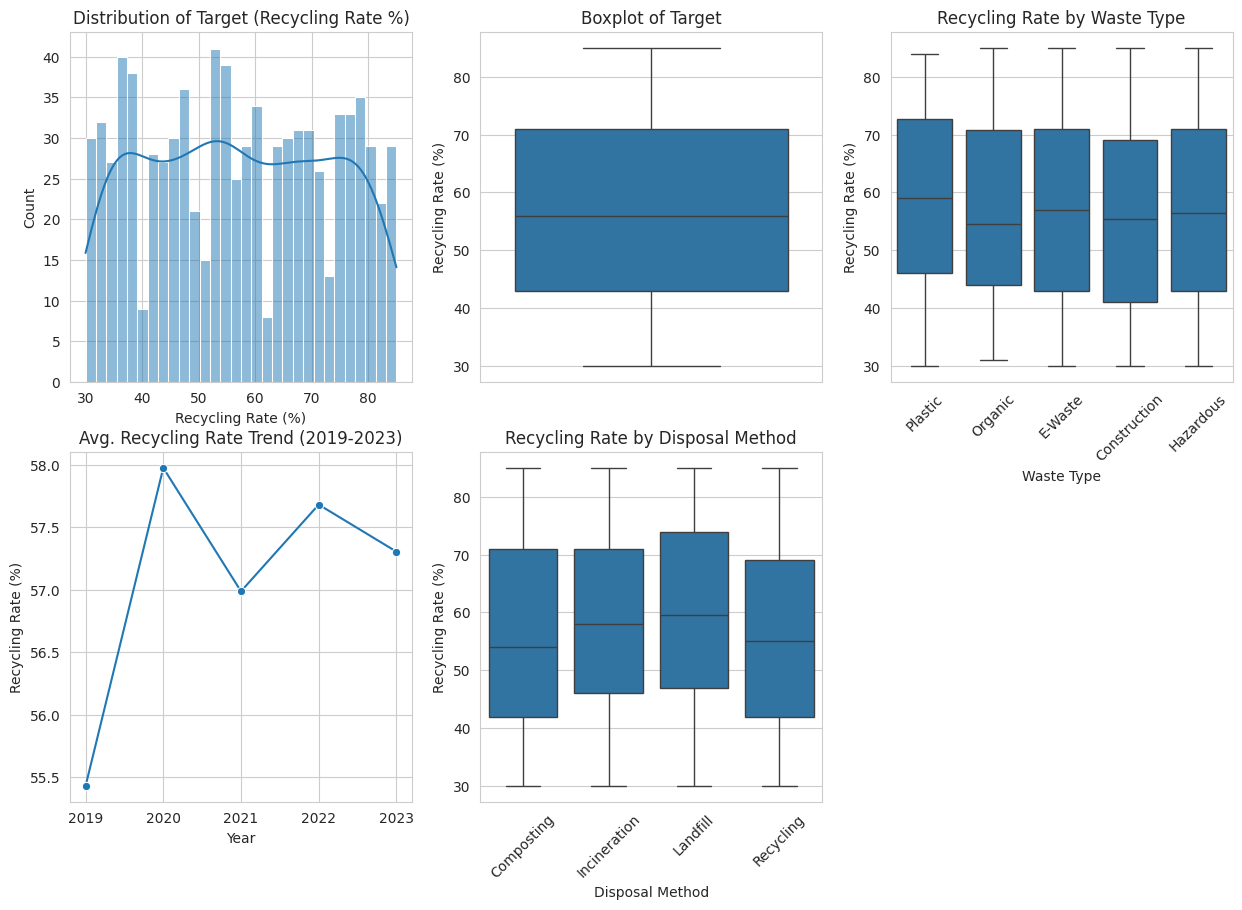

In [24]:
# Advanced Target Variable Analysis
plt.figure(figsize=(15, 10))

# 1. Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Recycling Rate (%)'], kde=True, bins=30)
plt.title('Distribution of Target (Recycling Rate %)')

# 2. Boxplot
plt.subplot(2, 3, 2)
sns.boxplot(y=df['Recycling Rate (%)'])
plt.title('Boxplot of Target')

# 3. Target vs. Waste Type
plt.subplot(2, 3, 3)
sns.boxplot(x='Waste Type', y='Recycling Rate (%)', data=df)
plt.xticks(rotation=45)
plt.title('Recycling Rate by Waste Type')

# 4. Target vs. Year (Temporal Trend)
plt.subplot(2, 3, 4)
yearly_avg = df.groupby('Year')['Recycling Rate (%)'].mean().reset_index()
sns.lineplot(x='Year', y='Recycling Rate (%)', data=yearly_avg, marker='o')
plt.title('Avg. Recycling Rate Trend (2019-2023)')

# # 5. Target vs. Disposal Method (Leakage Check)
plt.subplot(2, 3, 5)
sns.boxplot(x='Disposal Method', y='Recycling Rate (%)', data=df)
plt.xticks(rotation=45)
plt.title('Recycling Rate by Disposal Method')



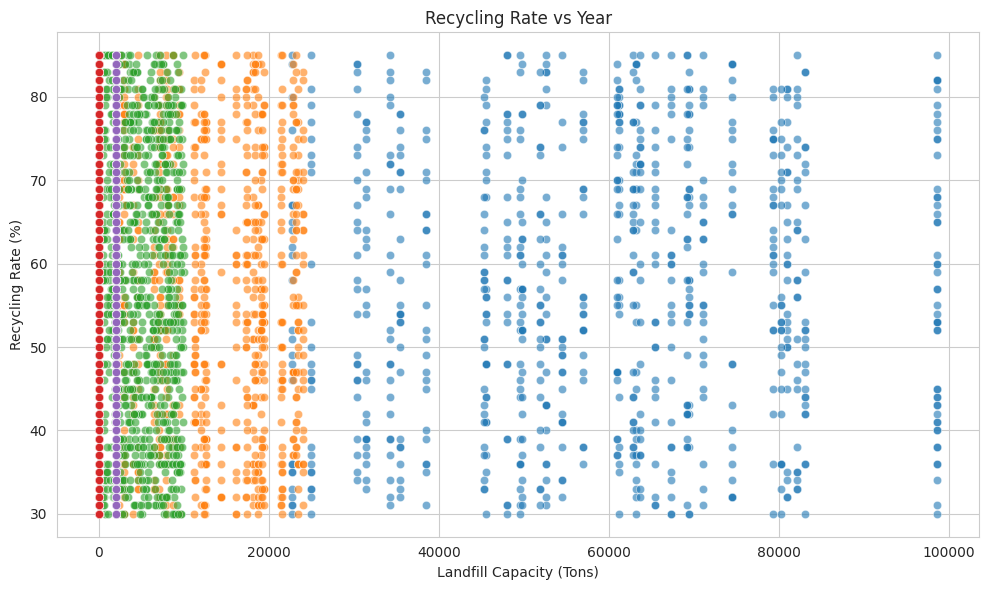

Target Skewness: 0.026


In [ ]:
# 6. Correlation with Numerical Features (Top 5)
# Select top 5 features most correlated with target
numeric_df = df.select_dtypes(include=[np.number])
corr_with_target = numeric_df.corr()['Recycling Rate (%)'].abs().sort_values(ascending=False)
top_5_features = corr_with_target.index[1:6]  # Index 0 is the target itself

for i, feature in enumerate(top_5_features, 6):
    sns.scatterplot(x=df[feature], y=df['Recycling Rate (%)'], alpha=0.6)
    plt.title(f'Recycling Rate vs {feature}')

plt.tight_layout()
plt.show()

print(f"Target Skewness: {df['Recycling Rate (%)'].skew():.3f}")

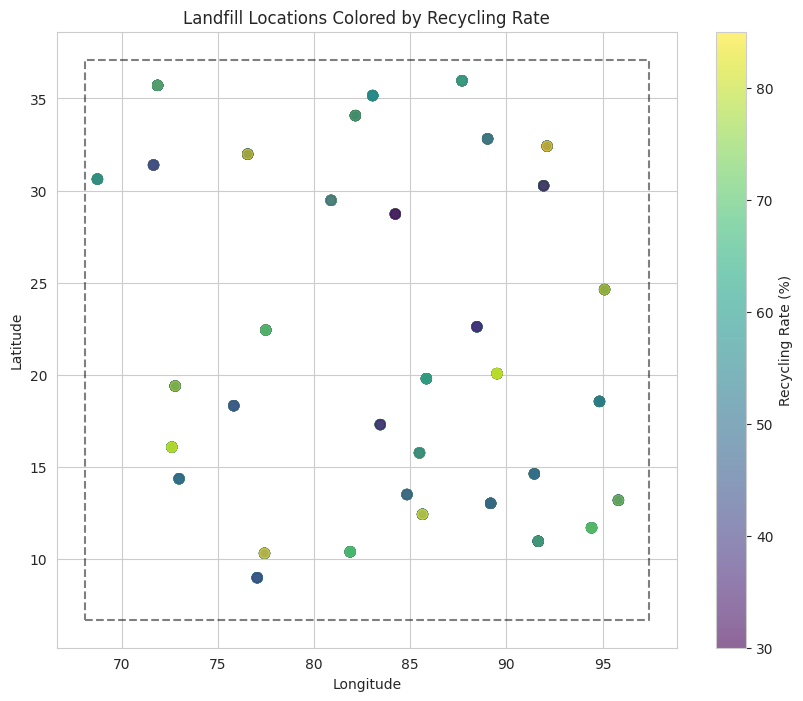

In [ ]:
# Geospatial Analysis (If time permits)
# Parse the Landfill Location
df[['Landfill_Lat', 'Landfill_Lon']] = df['Landfill Location (Lat, Long)'].str.split(', ', expand=True).astype(float)

# Plot landfill locations on a map of India (simplified)
plt.figure(figsize=(10, 8))
# Create a base map (India's approximate borders)
plt.plot([68.1, 97.4, 97.4, 68.1, 68.1], [6.7, 6.7, 37.1, 37.1, 6.7], 'k--', alpha=0.5) # Rough India outline

# Plot the landfill points
plt.scatter(df['Landfill_Lon'], df['Landfill_Lat'], alpha=0.6, c=df['Recycling Rate (%)'], cmap='viridis', s=50)
plt.colorbar(label='Recycling Rate (%)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Landfill Locations Colored by Recycling Rate')
plt.show()